In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import Symbol, diff, solve, nsolve, solveset, latex, S, simplify, fraction, Union, Interval, intersection, limit
from sympy.calculus.util import continuous_domain
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import pi as Pi
%matplotlib inline

## Занятие 8
## Математический анализ
## Дифференцирование функции, заданной параметрически
Пусть зависимость $y$ от $x$ задана параметрически:
$$
\left\{
\begin{matrix}
x = \varphi(t)\\
y = \psi(t)
\end{matrix}
\right.
$$
тогда производная $y$ по $x$  находится по формуле
$$
y'_x = \frac{y'_t}{x'_t} = \frac{\psi'_t}{\varphi'_t}
$$
Вторая производная:
$$
y''_{xx} = \frac{x'_t y''_{tt}-x''_{tt}y'_t}{(x'_t)^3}  = \frac{\varphi'_t \psi''_{tt}-\varphi''_{tt}\psi'_t}{(\varphi'_t)^3}
$$
### Задание 1
Найти производные 1 и 2 порядка функции 
$$
\left\{
\begin{matrix}
x = \sin(t) - t\cos(t)\\
y = \cos(t) + t\sin(t)
\end{matrix}
\right.
$$

In [2]:
t = Symbol('t')

x = Sin(t) - t*Cos(t)
y = Cos(t) + t*Sin(t)

dx = diff(x, t)
dy = diff(y, t)

dy_x = dy/dx
dy2_xx = (dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3

display(dy_x, dy2_xx)

cos(t)/sin(t)

(t*(-t*sin(t) + cos(t))*sin(t) - t*(t*cos(t) + sin(t))*cos(t))/(t**3*sin(t)**3)

In [3]:
dy2_xx = simplify(dy2_xx)
display(dy2_xx)

-1/(t*sin(t)**3)

### Задание 2.
Найти нули производных первого и второго порядка, а также точки, в которых эти производные не существуют, для функции
$$
\left\{
\begin{matrix}
x = t^2 - 2t\\
y = t^2 + 2t
\end{matrix}
\right.
$$

In [4]:
dy_x_num, dy_x_den = fraction(dy_x)  # num - numerator(числитель), den - denominator(знаменатель)
dy_x_num_nul = solveset(dy_x_num)
dy_x_den_nul = solveset(dy_x_den)
print("Первая производная")
display('нули числителя:', dy_x_num_nul, 'нули знаменателя:', dy_x_den_nul)

print("\n")

dy2_xx_num,dy2_xx_den = fraction(dy2_xx)  # num - numerator(числитель), den - denominator(знаменатель)
dy2_xx_num_nul = solveset(dy2_xx_num)
dy2_xx_den_nul = solveset(dy2_xx_den)
print("Вторая производная")
display('нули числителя:', dy2_xx_num_nul, 'нули знаменателя:', dy2_xx_den_nul)

Первая производная


'нули числителя:'

Union(ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers), ImageSet(Lambda(_n, 2*_n*pi + 3*pi/2), Integers))

'нули знаменателя:'

Union(ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers))



Вторая производная


'нули числителя:'

EmptySet

'нули знаменателя:'

Union(ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers))

### Задание 3. 
Найти точки экстремума и точки перегиба функции Задания 2.

In [5]:
crit_points = Union(dy_x_num_nul, dy_x_den_nul)
crit_points

Union(ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers), ImageSet(Lambda(_n, 2*_n*pi + 3*pi/2), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers))

In [6]:
crit_points_interval = crit_points.intersection(Interval.Ropen(0, 2*Pi))
crit_points_interval

FiniteSet(0, pi, pi/2, 3*pi/2)

In [7]:
crit_points_interval = list(crit_points_interval)
crit_points_interval.sort()
crit_points_interval

[0, pi/2, pi, 3*pi/2]

In [8]:
points = [-Pi/6] + [(item + crit_points_interval[i + 1])/2 for i, item in enumerate(crit_points_interval[:-1])] + [5*Pi/3]
points

[-pi/6, pi/4, 3*pi/4, 5*pi/4, 5*pi/3]

In [9]:
max_arr=[]
min_arr=[]
for i, item in enumerate(crit_points_interval):
    if item in dy_x_num_nul:  # проверка на ноль числителя (не знаменателя!)
        df_left = dy_x.subs(t, points[i])
        df_right = dy_x.subs(t, points[i + 1])
        x_left = float(x.subs(t, points[i]))
        x_right = float(x.subs(t, points[i + 1]))
        if df_left < 0 and df_right > 0 and x_left < x_right or df_left > 0 and df_right < 0 and x_left > x_right:  # по шаблону решения из теории
            min_arr.append(item)
        elif df_left < 0 and df_right > 0 and x_left > x_right or df_left > 0 and df_right < 0 and x_left < x_right:  # по шаблону решения из теории
            max_arr.append(item)
display('максимум', max_arr, 'минимум', min_arr)

'максимум'

[pi/2]

'минимум'

[3*pi/2]

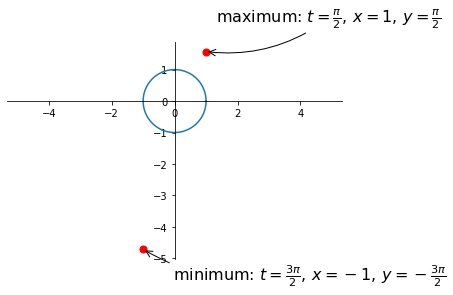

In [10]:
T = np.linspace(0, 2*np.pi, 100)
ax = plt.gca()
ax.plot(np.cos(T), np.sin(T))
ax.axis('equal')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
for item in max_arr + min_arr:
    if item in max_arr:
        extr = ('maximum:', (10, 30))
    elif item in min_arr:
        extr = ('minimum:', (30, -30))
    x0 = x.subs(t, item)
    y0 = y.subs(t, item)
    ax.scatter([x0], [y0], 50, color='red')
    ax.annotate(extr[0] + r' $t = ' + latex(item) + ',\,x = ' + latex(x0) + ',\,y = ' + latex(y0)+r'$',
              xy=(x0, y0), xycoords='data',
              xytext=extr[1], textcoords='offset points', fontsize=16,
              arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"))

### Задание 4. Точки перегиба
Найти точки перегиба функции, график строить не нужно. 
$$
\left\{
\begin{matrix}
x = e^t\\
y = te^{2t}
\end{matrix}
\right.
$$

In [11]:
t = Symbol('t')

x = sympy.exp(t)
y = t * sympy.exp(2*t)

dx = diff(x, t)
dy = diff(y, t)

dy_x = dy/dx

print("dy_x до simplify:")
display(dy_x)

print()

dy_x = simplify(dy_x)
print("dy_x после simplify:")
display(dy_x)

print("\n\n")

dy2_xx = (dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3

print("dy2_xx до simplify:")
display(dy2_xx)

print()

dy2_xx = simplify(dy2_xx)
print("dy2_xx после simplify:")
display(dy2_xx)

dy2_xx_num, dy2_xx_den = fraction(dy2_xx)

dy2_xx_num_nul = solveset(dy2_xx_num)
dy2_xx_den_nul = solveset(dy2_xx_den)

dy2_xx_points = list((dy2_xx_num_nul.union(dy2_xx_den_nul)))
dy2_xx_points.sort()
print("\nнули второй производной:")
display(*dy2_xx_points)

dy_x до simplify:


(2*t*exp(2*t) + exp(2*t))*exp(-t)


dy_x после simplify:


(2*t + 1)*exp(t)




dy2_xx до simplify:


(4*(t + 1)*exp(3*t) - (2*t*exp(2*t) + exp(2*t))*exp(t))*exp(-3*t)


dy2_xx после simplify:


2*t + 3


нули второй производной:


-3/2

In [12]:
points = [sympy.S(-5)/2] + dy2_xx_points + [sympy.S(-1)/2]
display(*points)

-5/2

-3/2

-1/2

In [13]:
inflection=[]
for i, item in enumerate(dy2_xx_points):
    if item in dy2_xx_num_nul:
        df_left = dy2_xx.subs(t, points[i])
        df_right = dy2_xx.subs(t, points[i + 1])
        if df_left*df_right <= 0 and (df_right != 0 or df_left != 0):
            inflection.append(item) 
print('Перегиб', *inflection)

Перегиб -3/2


## Асимптоты параметрически заданной функции
Пусть зависимость $y$ от $x$ задана параметрически:
$$
\left\{
\begin{matrix}
x = \varphi(t)\\
y = \psi(t)
\end{matrix}
\right.
$$
Сначала нужно определить, нет ли таких значений параметра $t$, при которых одна из функций $\varphi(t)$ или $\psi(t)$ обращается в бесконечность, а другая остается конечной. При $\varphi(t_0) = \infty$, а $\psi(t_0) = c$ кривая имеет горизонтальную асимптоту  $y = c$. При  $\psi(t_0) = \infty$, а $\varphi(t_0) = c$ кривая имеет вертикальную асимптоту $x = c$. 

Если $\varphi(t_0) = \psi(t_0) = \infty$ и 
$$
\lim_{t\to t_0} \frac{\psi(t)}{\varphi(t)} = k;\qquad \lim_{t\to t_0} [\psi(t) - k\varphi(t)] = b,
$$
то   кривая имеет наклонную асимптоту  $y = kx + b$. 

### Индивидуальное задание.
Найти асимптоты параметрически заданной функции и изобразить на графике функцию и ее асимптоты.

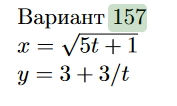

In [14]:
# ДАНО:
t = Symbol('t')
x = sympy.sqrt(5*t + 1)
y = 3 + 3/t
display(x, y)

sqrt(5*t + 1)

3 + 3/t

In [15]:
# поищем потенциальные точки, в которых будем высчитывать предел через t -> *точка*
print("область определения:")
display(continuous_domain(x, t, S.Reals))
print("область значения:")
display(continuous_domain(y, t, S.Reals))

область определения:


Interval(-1/5, oo)

область значения:


Union(Interval.open(-oo, 0), Interval.open(0, oo))

будем рассматривать lim'ы при t -> -1/5, 0, −∞, +∞

In [16]:
# Проверим значение t = 0
print(f"lim y(t) = {limit(y, t, 0)}")
print(f"lim x(t) = {limit(x, t, 0)}")

lim y(t) = oo
lim x(t) = 1


Исходя из результатов, получаем вертикальную ассимптоту x = 1


In [19]:
# Проверим значение t = -1/5
print(f"lim y(t) = {limit(y, t, sympy.S(-1)/5)}")
print(f"lim x(t) = {limit(x, t, sympy.S(-1)/5)}")

lim y(t) = -12
lim x(t) = 0


Исходя из результатов, получаем, что при t -> -1/5 ассимптоты отсутствуют

In [21]:
# Проверим значение +infinity
print(f"lim y(t) = {limit(y, t, +sympy.oo)}")
print(f"lim x(t) = {limit(x, t, +sympy.oo)}")

lim y(t) = 3
lim x(t) = oo


Исходя из результатов, получаем горизонтальную ассимптоту y = 3 при x -> +infinity

In [22]:
# Проверим значение -infinity
print(f"lim y(t) = {limit(y, t, -sympy.oo)}")
print(f"lim x(t) = {limit(x, t, -sympy.oo)}")

lim y(t) = 3
lim x(t) = oo*I


Исходя из результатов, получаем горизонтальную ассимптоту y = 3 при x -> -infinity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


(-200.0, 246.60000000000005)

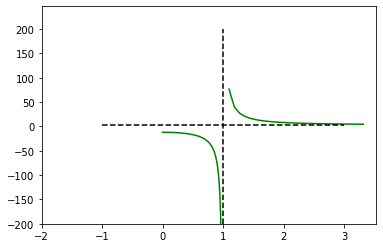

In [129]:
T = np.linspace(-1/5, 0, 50)
plt.plot(np.sqrt(5*T + 1), 3 + 3/T, color='green')
T = np.linspace(0, 2, 50)
plt.plot(np.sqrt(5*T + 1), 3 + 3/T, color='green')
plt.plot([1, 1], [-200, 200], color='black', linestyle='--')
plt.plot([-1, 3], [3, 3], color='black', linestyle='--')
plt.xlim(-2)
plt.ylim(-200)

Хорасанджян Левон, вариант №157